# Лабораторная работа № 1, вариант 10

## Цель работы: познакомиться с использованием библиотеки pandas при решении практических задач, связанных с анализом данных.

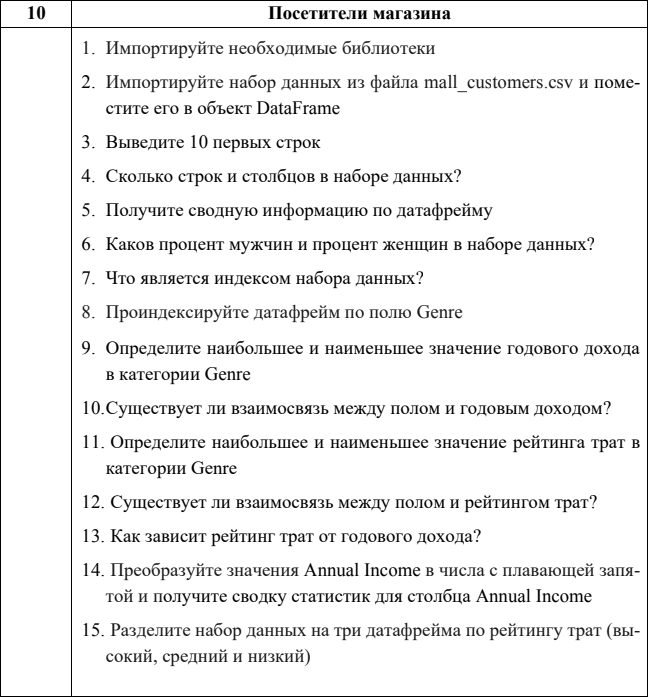

#### Описание полей: 
- CustomerID – идентификатор покупателя;
- Genre – пол;
- Age – возраст;
- Annual Income (k$) – годовой доход;
- Spending Score (1-100) – рейтинг трат.

## 1. Импортируйте необходимые библиотеки

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Импортируйте набор данных из файла mall_customers.csv и поместите его в объект DataFrame

In [4]:
df = pd.read_csv('mall_customers.csv')

## 3. Выведите 10 первых строк

In [6]:
df.head(10)

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6
7           8  Female   23                  18                      94
8           9    Male   64                  19                       3
9          10  Female   30                  19                      72

## 4. Сколько строк и столбцов в наборе данных?

In [7]:
print(f"Строк: {df.shape[0]}, Столбцов: {df.shape[1]}")

Строк: 200, Столбцов: 5


## 5. Получите сводную информацию по датафрейму

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## 6. Каков процент мужчин и процент женщин в наборе данных?

In [9]:
gender_counts = df['Genre'].value_counts(normalize=True) * 100
print(f"Мужчины: {gender_counts['Male']:.1f}%")
print(f"Женщины: {gender_counts['Female']:.1f}%")

Мужчины: 44.0%
Женщины: 56.0%


## 7. Что является индексом набора данных?

In [5]:
print(f"Текущий индекс: {df.index}")

Текущий индекс: RangeIndex(start=0, stop=200, step=1)


## 8. Проиндексируйте датафрейм по полю Genre

In [6]:
df = df.set_index('Genre')
print(f"Текущий индекс: {df.head()}")

Текущий индекс:         CustomerID  Age  Annual Income (k$)  Spending Score (1-100)
Genre                                                              
Male             1   19                  15                      39
Male             2   21                  15                      81
Female           3   20                  16                       6
Female           4   23                  16                      77
Female           5   31                  17                      40


## 9. Определите наибольшее и наименьшее значение годового дохода в категории Genre

In [17]:
goods = df.groupby('Genre')
print(f'Максимальный доход: {goods['Annual Income (k$)'].max()}, Минимальный доход: {goods['Annual Income (k$)'].min()}')

Максимальный доход: Genre
Female    126
Male      137
Name: Annual Income (k$), dtype: int64, Минимальный доход: Genre
Female    16
Male      15
Name: Annual Income (k$), dtype: int64


## 10. Существует ли взаимосвязь между полом и годовым доходом?

In [23]:
meanMoney = goods['Annual Income (k$)'].mean()
print(f'Доход: {meanMoney}')

Доход: Genre
Female    59.250000
Male      62.227273
Name: Annual Income (k$), dtype: float64


#### Разница составляет 3%, что не является существенным признаком

## 11. Определите наибольшее и наименьшее значение рейтинга трат в категории Genre

In [22]:
print(f'Максимальный рейтинг: {goods['Spending Score (1-100)'].max()}, Минимальный рейтинг: {goods['Spending Score (1-100)'].min()}')

Максимальный рейтинг: Genre
Female    99
Male      97
Name: Spending Score (1-100), dtype: int64, Минимальный рейтинг: Genre
Female    5
Male      1
Name: Spending Score (1-100), dtype: int64


## 12. Существует ли взаимосвязь между полом и рейтингом трат?

In [24]:
meanScore = goods['Spending Score (1-100)'].mean()
print(f'Рейтинг: {meanScore}')

Рейтинг: Genre
Female    51.526786
Male      48.511364
Name: Spending Score (1-100), dtype: float64


## 13. Как зависит рейтинг трат от годового дохода?

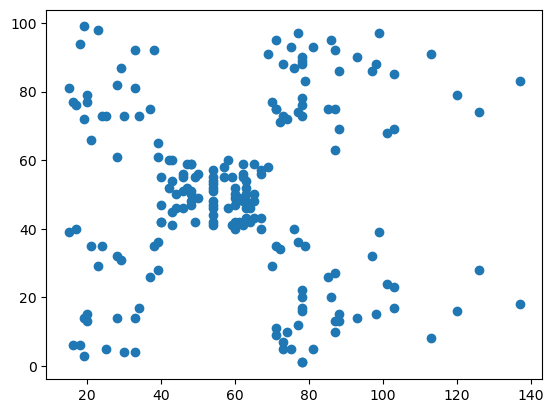

In [26]:
plt.scatter(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'])
plt.show()

### Дополнение: Четкой линейной зависимости не обнаружено. Данные сегментированы на несколько групп потребителей с разным сочетанием дохода и покупательской активности

## 14. Преобразуйте значения Annual Income в числа с плавающей запятой и получите сводку статистик для столбца Annual Income

In [27]:
# 14. Преобразуем доход в float
df['Annual Income (k$)'] = df['Annual Income (k$)'].astype(float)

# Статистика по доходу
print(df['Annual Income (k$)'].describe())

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64


## Разделите набор данных на три датафрейма по рейтингу трат (высокий, средний и низкий)

In [28]:
low_spending = df[df['Spending Score (1-100)'] < 34]
medium_spending = df[(df['Spending Score (1-100)'] >= 34) & (df['Spending Score (1-100)'] <= 67)]
high_spending = df[df['Spending Score (1-100)'] > 67]

print(f"Низкий рейтинг: {len(low_spending)} клиентов")
print(f"Средний рейтинг: {len(medium_spending)} клиентов") 
print(f"Высокий рейтинг: {len(high_spending)} клиентов")

Низкий рейтинг: 49 клиентов
Средний рейтинг: 94 клиентов
Высокий рейтинг: 57 клиентов
